In [1]:
import pandas as pd
import numpy as np

In [2]:
#Panda has four time related functions. Timestamp, Datetimeindex, Period, and PeriodIndex

## Timestamp

In [4]:
#Associated values with points in time 

In [5]:
pd.Timestamp('9/1/2016 10:05AM')

Timestamp('2016-09-01 10:05:00')

 ## Period 

In [6]:
#Specific day or month 

In [7]:
pd.Period('1/2016')

Period('2016-01', 'M')

In [8]:
pd.Period('3/5/2016')

Period('2016-03-05', 'D')

## DatetimeIndex 

In [9]:
t1 = pd.Series(list('abc'), [pd.Timestamp('2016-09-01'), pd.Timestamp('2016-09-02'), pd.Timestamp('2016-09-03')])
t1

2016-09-01    a
2016-09-02    b
2016-09-03    c
dtype: object

In [10]:
type(t1.index)

pandas.tseries.index.DatetimeIndex

## PeriodIndex

In [11]:
t2 = pd.Series(list('def'), [pd.Period('2016-09'), pd.Period('2016-10'), pd.Period('2016-11')])
t2

2016-09    d
2016-10    e
2016-11    f
Freq: M, dtype: object

In [12]:
type(t2.index)

pandas.tseries.period.PeriodIndex

## Converting to Dateframe

In [13]:
d1 = ['2 June 2013', 'Aug 29, 2014', '2015-06-26', '7/12/16']
ts3 = pd.DataFrame(np.random.randint(10, 100, (4,2)), index=d1, columns=list('ab'))
ts3

,a,b
2 June 2013,65,80
"Aug 29, 2014",41,85
2015-06-26,80,48
7/12/16,14,44


In [14]:
#Convert time stamps into standard format 

In [15]:
ts3.index = pd.to_datetime(ts3.index)
ts3

,a,b
2013-06-02,65,80
2014-08-29,41,85
2015-06-26,80,48
2016-07-12,14,44


In [16]:
pd.to_datetime('4.7.12', dayfirst=True)

Timestamp('2012-07-04 00:00:00')

## Timedeltas 

In [17]:
pd.Timestamp('9/3/2016')-pd.Timestamp('9/1/2016')

Timedelta('2 days 00:00:00')

In [18]:
pd.Timestamp('9/2/2016 8:10AM') + pd.Timedelta('12D 3H')

Timestamp('2016-09-14 11:10:00')

## Working with Dates in Dataframe 

In [19]:
dates = pd.date_range('10-01-2016', periods=9, freq='2W-SUN')
dates

DatetimeIndex(['2016-10-02', '2016-10-16', '2016-10-30', '2016-11-13',
               '2016-11-27', '2016-12-11', '2016-12-25', '2017-01-08',
               '2017-01-22'],
              dtype='datetime64[ns]', freq='2W-SUN')

In [20]:
df = pd.DataFrame({'Count 1': 100 + np.random.randint(-5, 10, 9).cumsum(),
                  'Count 2': 120 + np.random.randint(-5, 10, 9)}, index=dates)
df

,Count 1,Count 2
2016-10-02,103,120
2016-10-16,109,129
2016-10-30,106,115
2016-11-13,101,125
2016-11-27,100,125
2016-12-11,100,125
2016-12-25,101,120
2017-01-08,97,126
2017-01-22,96,115


In [21]:
#See the days in the index 
df.index.weekday_name

array(['Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday',
       'Sunday', 'Sunday', 'Sunday'], dtype=object)

In [22]:
#Find the difference between each dates value 
df.diff()

,Count 1,Count 2
2016-10-02,NaN,NaN
2016-10-16,6.0,9.0
2016-10-30,-3.0,-14.0
2016-11-13,-5.0,10.0
2016-11-27,-1.0,0.0
2016-12-11,0.0,0.0
2016-12-25,1.0,-5.0
2017-01-08,-4.0,6.0
2017-01-22,-1.0,-11.0


In [23]:
#mean count for each month

In [24]:
df.resample('M').mean()

,Count 1,Count 2
2016-10-31,106.0,121.333333
2016-11-30,100.5,125.000000
2016-12-31,100.5,122.500000
2017-01-31,96.5,120.500000


In [25]:
#Partial indexing or slice on a range of dates 
df['2017']

,Count 1,Count 2
2017-01-08,97,126
2017-01-22,96,115


In [26]:
df['2016-12']

,Count 1,Count 2
2016-12-11,100,125
2016-12-25,101,120


In [27]:
df['2016-12':]

,Count 1,Count 2
2016-12-11,100,125
2016-12-25,101,120
2017-01-08,97,126
2017-01-22,96,115


In [28]:
#Change the frequency of the dates 
df.asfreq('W', method='ffill')

,Count 1,Count 2
2016-10-02,103,120
2016-10-09,103,120
2016-10-16,109,129
2016-10-23,109,129
2016-10-30,106,115
2016-11-06,106,115
2016-11-13,101,125
2016-11-20,101,125
2016-11-27,100,125
2016-12-04,100,125


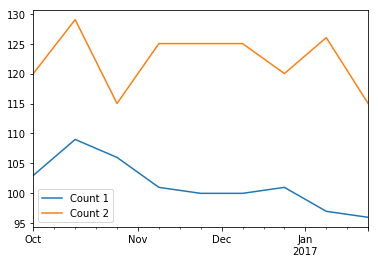

In [29]:
import matplotlib.pyplot as plt   #Visualize date data
%matplotlib inline

df.plot()